In [137]:
import pandas as pd
import numpy as np


# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

sns.set(font_scale = 2)

# Imputing missing values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import tree

# LIME for explaining predictions
import lime 
import lime.lime_tabular

In [39]:
#import the data
data = pd.read_csv("C:/Users/User/Desktop/Datascience Projects/benchmark.txt", sep = ",", header = 0, encoding = "latin1")

In [40]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [42]:
#replace all occurence of not available with numpy not a number
data = data.replace({'Not Available': np.nan})

#iterate through columns
for col in list(data.columns):
    #select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' 
       in col or 'themrs' in col or 'gal' in col or 'Score' in col):
        #convert datatype to float
        data[col] = data[col].astype(float)

In [43]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+05,2.064497e+07,6.855070e+06,4.370302e+06,1.284677e+06,9.084250e+02,4.475000e+02,4.249000e+02,1.584140e+05,8.031875e+03,70.80500

In [44]:
#function to identify missing values
def missing_values_table(df):

    mis_val = df.isnull().sum()
    #percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    #make a table with results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis =1)
    #rename the column
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0:'Missing Values',1: '% of total missing values'})
    #sort the table by percentage of missing descending

#print summary information
    print("Your selected dataframe has" + str(df.shape[1]) + " columns.\n"
     "There are" + str(mis_val_table_ren_columns.shape[0])+
     " columns that have missing values.")
    
#return the dataframe with missing information
    return mis_val_table_ren_columns

In [45]:
missing_values_table(data)

Your selected dataframe has60 columns.
There are60 columns that have missing values.


,Missing Values,% of total missing values
Order,0,0.000000
Property Id,0,0.000000
Property Name,0,0.000000
Parent Property Id,0,0.000000
Parent Property Name,0,0.000000
BBL - 10 digits,11,0.093649
"NYC Borough, Block and Lot (BBL) self-reported",11,0.093649
NYC Building Identification Number (BIN),162,1.379193
Address 1 (self-reported),0,0.000000
Address 2,11539,98.237698


In [46]:
#Get the columns with > 50% Missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of total missing values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has60 columns.
There are60 columns that have missing values.
We will remove 11 columns.


In [47]:
#Drop the columns
data = data.drop(columns = list(missing_columns))

### Exploratory Data Analysis

Text(0.5, 1.0, 'Energy Start Score Dist')

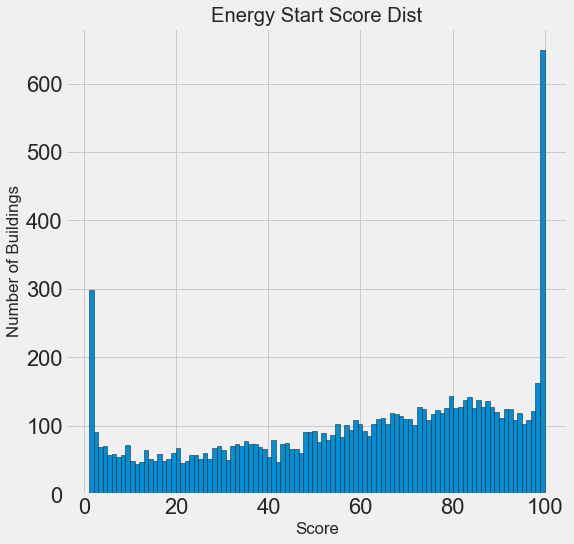

In [48]:
figsize(8,8)

#Rename the score
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

#Histogram of Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score');plt.ylabel('Number of Buildings');
plt.title('Energy Start Score Dist')

### Looking For Relationships
##### We will build a density plot using the seaborn library. A density plot can be thought of a smoothed histogram because it shows the distribution of a single variable. The following code makes a density plot of the Energy Star Score colored by the type of building (limited to building types with more than 100 data points).

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


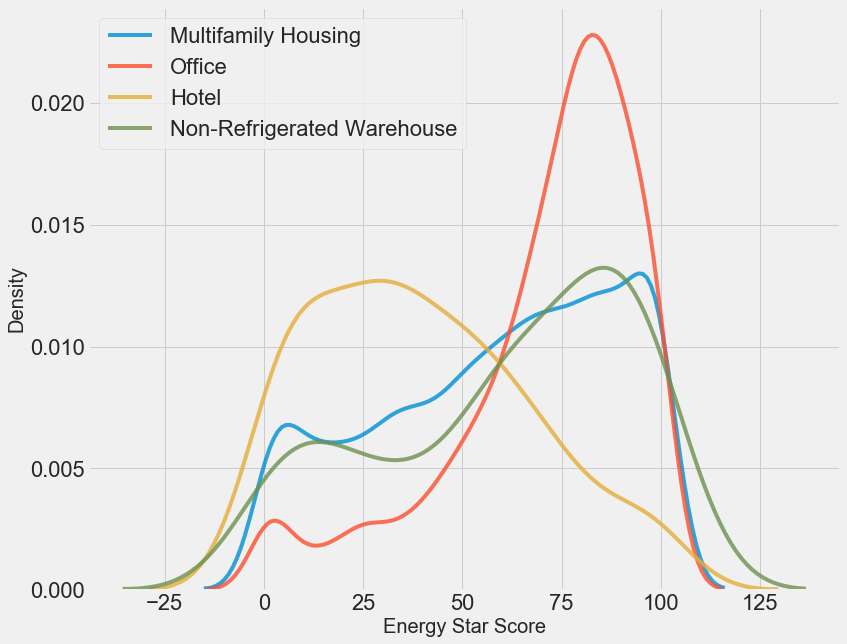

In [49]:
#create a list of buildings with more than 100 measurements
types = data.dropna(subset = ['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

#plot the distribution of scores for building categories
figsize(12,10)

#plot each building
for b_type in types:
    #select the building types
    subset = data[data['Largest Property Use Type'] == b_type]
    
    #Density plot of Energy Star Scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
    #label the plot
    plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20);

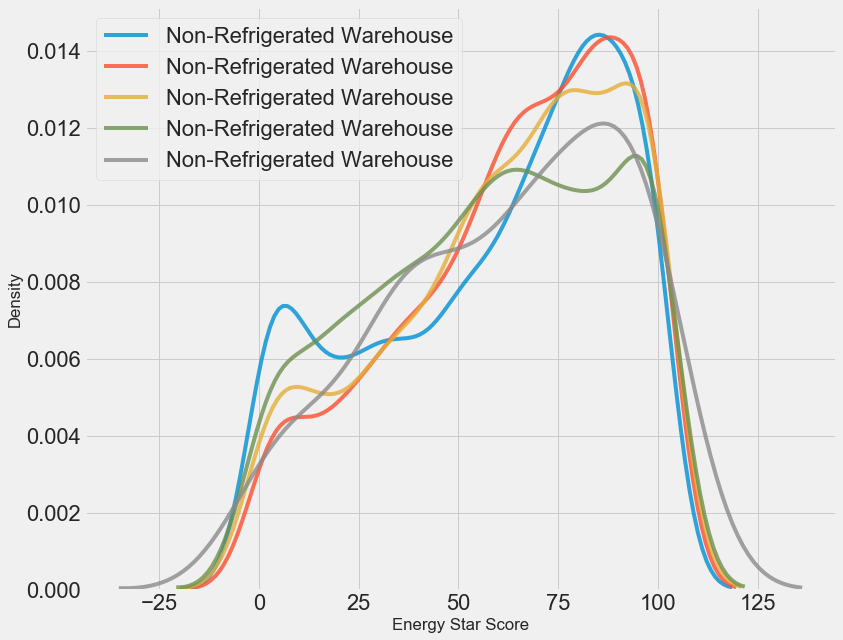

In [50]:
#Create a list of boroughs with more than 100 measurements
boroughs = data.dropna(subset = ['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)


#creating a density plot
figsize(12,10)

#plot each building
for bor in boroughs:
    subset = data[data['Borough'] == bor]
    
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    #label the plot
    plt.xlabel('Energy Star Score');plt.ylabel('Density')
    

##### Dealing with outliers

Text(0.5, 1.0, 'Site EUI Distribution')

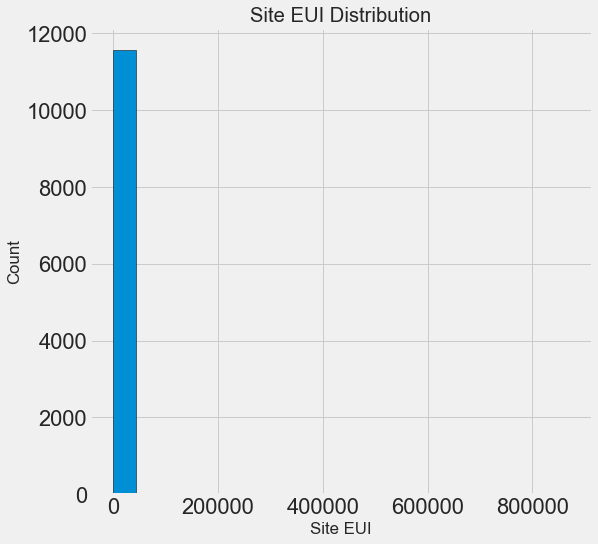

In [51]:
#Histogram Plot of Site EUI
figsize(8,8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins =20, edgecolor ='black')
plt.xlabel('Site EUI');
plt.ylabel('Count'); plt.title('Site EUI Distribution')

In [52]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [53]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [54]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,5.344589688E8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


#### Removing Outliers
##### We have to careful as to what we define as outliers so we will take the definition of extreme outlier range
#### On the low end, an extreme outlier is below First Quartile-3*Interquartile Range
#### On the high end, an extreme outlier is above Third Quartile - 3*Interquartile Range

In [55]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Text(0.5, 1.0, 'Site EUI Distribution')

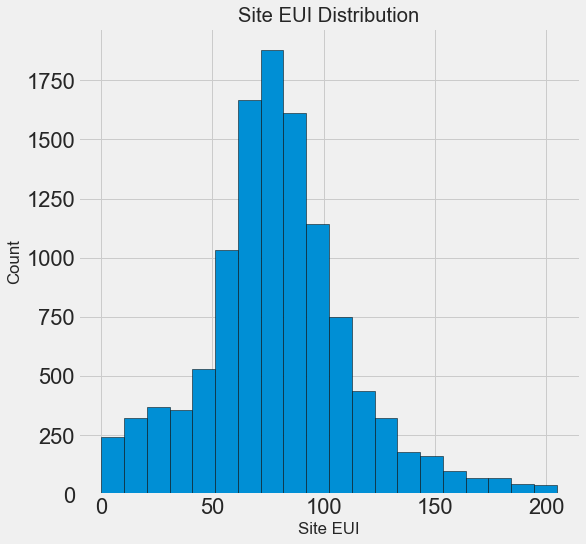

In [56]:
figsize(8,8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel("Site EUI");
plt.ylabel("Count");
plt.title("Site EUI Distribution")

In [57]:
#Create a list of buildings with more than 100 measurements
types = data.dropna(subset = ['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

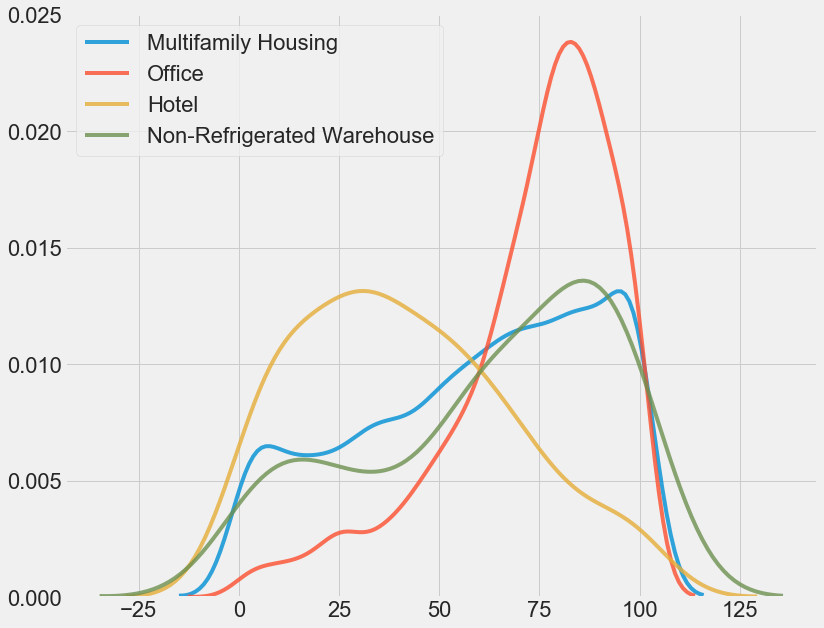

In [58]:
#creating a density plot 
figsize(12,10)

#plot each building
for b_type in types:
    #select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    #Density plot of Energy Star Scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);

In [59]:
#Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Boroughs')

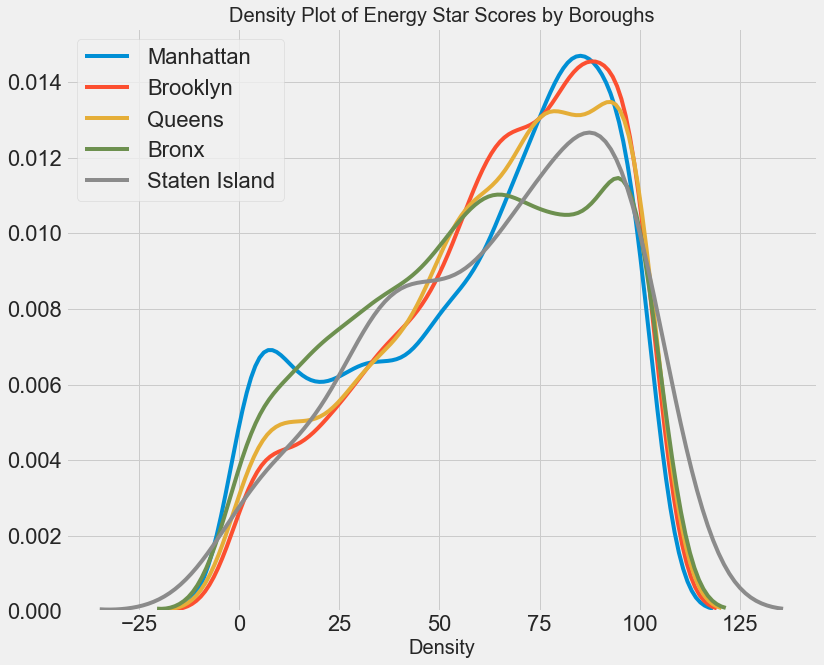

In [60]:
#plot the density plot of boroughs
figsize(12,10)
for borough in boroughs:
    #Select the building type
    subset = data[data['Borough'] == borough]
    
    #Density plot of Energy Star Scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);

#label the plot
plt.xlabel('Energy Star Score', size = 20); plt.xlabel("Density", size = 20);
plt.title('Density Plot of Energy Star Scores by Boroughs', size = 20)

##### To quantify relationships between variables, we can use the Pearson Correlation Coefficient.
##### This is a measure of the strength and direction of a linear relationship between two variables.  A score of +1 is a perfectly linear positive relationship and a score of -1 is a perfectly negative linear relationship

In [61]:
#Find all correlations and sort
correlations_data = data.corr()['score'].sort_values()

#print the most negative correlations
print(correlations_data.head(15), '\n')

#print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Property Id                                                  -0.046605
Indire

##### In the following code, we take log and squre root transformations of the numerical variables, one hot encode the two selected categorical variables(building type and borough), calculate the correlations between all of the features and the score, and display the top 15 most positive and top 15 most negative correlations. 

In [62]:
#select the numerical variables
numeric_subset = data.select_dtypes('number')

#transform the numeric variables to square root and log 
for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

#Select the categorical columns
categorical_subset = data[['Borough','Largest Property Use Type']]

#One Hot Encode
categorical_subset = pd.get_dummies(categorical_subset)

#Join the two dataframes using concat
#make sure to use axis = 1, so that it is a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

#dropping building with no energy score
features = features.dropna(subset = ['score'])

#finding correlation with the score
correlations = features.corr()['score'].dropna().sort_values()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [63]:
#display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [64]:
#Display most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

##### Two Variable Plots
###### In order to visualize the relationship between two variables, we use a scatterplot. We can also include additional variables using aspects such as color of the markers or size of the markers 

C:\Users\User\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Energy Star Score vs Sire EUI')

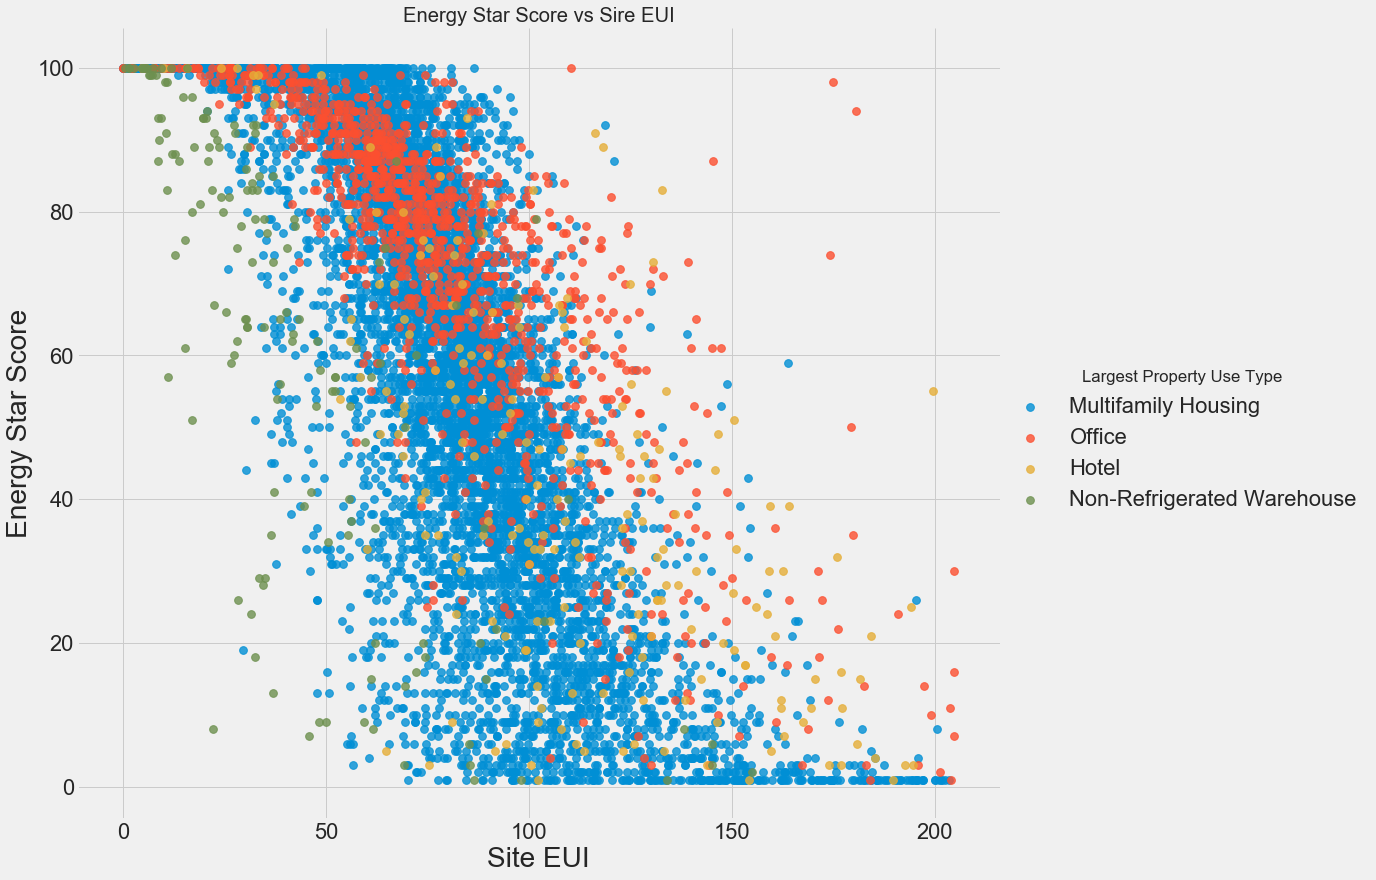

In [65]:
figsize(12,10)
#Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

#Limit to building types with more than 100 observations
features = features[features['Largest Property Use Type'].isin(types)]

#Use seaborn to plot the scatterplot of score vs log source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score',
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's':60}, fit_reg = False,
           size = 12, aspect = 1.2);

#Label the plot
plt.xlabel('Site EUI', size = 28);
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Sire EUI')

#### Pair Plots
##### Building Plots between several different variables. We will use seaborn PairGrid function.

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


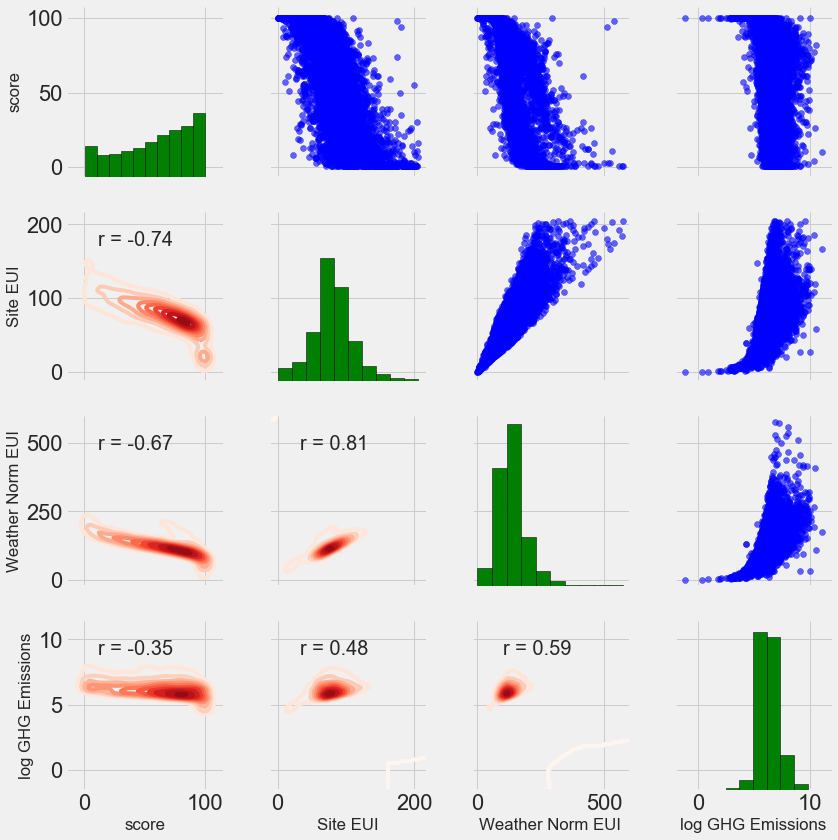

In [66]:
#Extract the columns to plotted
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]
#replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

#rename the columns
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

#Drop na values
plot_data = plot_data.dropna()

#Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
               xy = (.2,.8), xycoords=ax.transAxes,
               size = 20)
    
#Create the pairgrid object
grid = sns.PairGrid(data = plot_data,size = 3)

#upper is a hisogram
grid.map_upper(plt.scatter, color = 'blue', alpha = 0.6)

#diagonal is a histogram
grid.map_diag(plt.hist, color = 'green', edgecolor = 'black')

#bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)


#### Feature Engineering and Selection
##### Feature Engineering:-Extracting and creating new data points from existing data.
##### Feature Selection:- Identifying the data points that are most relevant, removing the points that are not.

##### we will do the following:
##### Select only numerical variables and two categorical variables(borough and property use type)
##### Add in log transformation on the numerical variables
##### One-Hot encode the categorical variables

In [73]:

# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


(11319, 108)

##### Remove highly collinear features

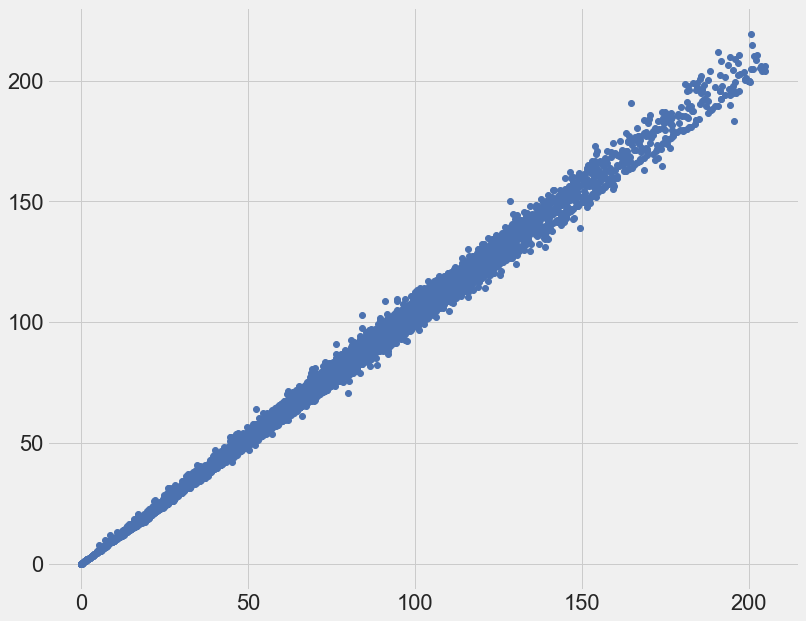

In [74]:
plot_data =  data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')

In [76]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [78]:
#remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


KeyError: "['Weather Normalized Site EUI (kBtu/ft²)'\n 'Water Use (All Water Sources) (kgal)'\n 'log_Water Use (All Water Sources) (kgal)'\n 'Largest Property Use Type - Gross Floor Area (ft²)'] not found in axis"

In [79]:
#remove columns with all na values
features = features.dropna(axis = 1, how = 'all')
features.shape

(11319, 65)

##### Splitting the data into testing and training set

In [81]:
#Extract the building with no score and building with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [83]:
#separate out the features and targets
features = score.drop(columns = 'score')
targets = pd.DataFrame(score['score'])

#replace the -inf and inf to nan
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

#split into 70% training and 30% testing
X,X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


##### Establishing a naive baseline. The goal is to check that the ML approach is actually solving a problem. 
##### We will use the mean absolute error

In [84]:
#Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

###### Now we can take a median guess and evaluate it on the test set

In [86]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print('Baseline Performance on the test set: MAE = %0.4f' % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


In [91]:
#save the no score, training and testing data
no_score.to_csv('C:/Users/User/Desktop/Datascience Projects/no_score.csv', index = False)
X.to_csv('C:/Users/User/Desktop/Datascience Projects/training_features.csv', index = False)
y.to_csv('C:/Users/User/Desktop/Datascience Projects/training_labels.csv', index = False)
y_test.to_csv('C:/Users/User/Desktop/Datascience Projects/testing_label.csv', index = False)
X_test.to_csv('C:/Users/User/Desktop/Datascience Projects/testing_features.csv', index = False)


In [92]:
train_features = pd.read_csv('C:/Users/User/Desktop/Datascience Projects/training_features.csv')
test_features = pd.read_csv('C:/Users/User/Desktop/Datascience Projects/testing_features.csv')
train_labels = pd.read_csv('C:/Users/User/Desktop/Datascience Projects/training_labels.csv')
test_labels = pd.read_csv('C:/Users/User/Desktop/Datascience Projects/testing_label.csv')

In [93]:
train_features.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),log_Water Intensity (All Water Sources) (gal/ft²),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,...,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,13276,5849784,90300.0,1950,1,100,126.0,5.2,1.2,99.41,NaN,NaN,NaN,NaN,6.088818,4.599253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7377,4398442,52000.0,1926,1,100,95.4,4.7,0.9,NaN,40.835496,-73.887745,3.0,161.0,5.384036,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9479,4665374,104700.0,1954,1,100,40.4,3.8,0.3,NaN,40.663206,-73.949469,9.0,329.0,5.017280,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14774,3393340,129333.0,1992,1,100,157.1,16.9,1.1,NaN,40.622968,-74.078742,1.0,27.0,6.510853,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3286,2704325,109896.0,1927,1,100,62.3,3.5,0.0,28.65,40.782421,-73.972622,7.0,165.0,6.123589,3.355153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
#using the median imputer
imputer = Imputer(strategy='median')

#train on the training model
imputer.fit(train_features)

#transform both training and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [96]:
print('Missing values in training features:', np.sum(np.isnan(X)))
print('Missing values in testing features:', np.sum(np.isnan(X_test)))

Missing values in training features: 0
Missing values in testing features: 0


In [97]:
#making sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


##### Scaling feature: to ensure that all the values are in comparable values

In [98]:
#Create a scalar object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0,1))

#Fit on the training data
scaler.fit(X)

#Transform the test and train data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [100]:
#convert y to a one-dimensional array (vector)
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

##### Models to Evaluate

We will compare five different ML models using Scikit-Learn Library
1. Linear Regression
2. Support Vector Machines
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

In [101]:
#Function to calculate the mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

#Takes in a model, train the model and evaluate the model on the test set
def fit_and_evaluate(model):
    #Train the model
    model.fit(X,y)
    
    #make predictions and evaluate
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    #return the preformance metric
    return model_mae

In [103]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the Test Set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the Test Set: MAE = 13.4651


In [105]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Performance on the Test Set: MAE = %0.4f' %svm_mae)

Support Vector Machine Performance on the Test Set: MAE = 10.9337


In [107]:
random_forest = RandomForestRegressor(random_state = 60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' %random_forest_mae)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 10.0073


In [109]:
gradient_boosted = GradientBoostingRegressor(random_state = 60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Performance on the Test Set: MAE = %0.4f' %gradient_boosted_mae)

Gradient Boosted Performance on the Test Set: MAE = 10.0144


In [111]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn_mae = fit_and_evaluate(knn)

print('KNN Performance on the test set: MAE %0.4f' %knn_mae)

KNN Performance on the test set: MAE 13.0131


Text(0.5, 1.0, 'Model Comparison on Test MAE')

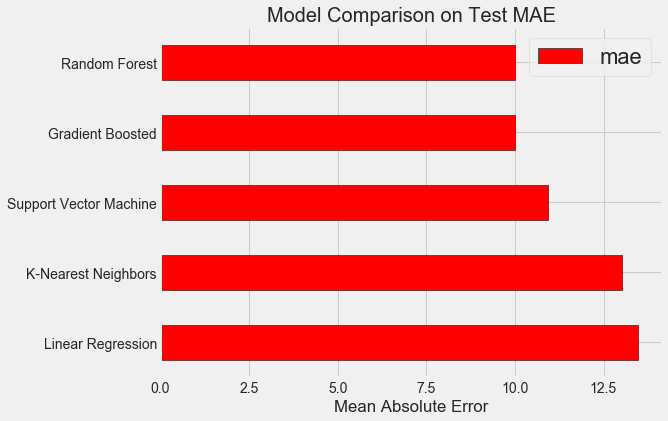

In [112]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

##### Model Optimization
Tuning the model will control the over and underfitting challenges.
Hyperparameter tuning with Random search and cross validation.
Random search refers to the method in which we choose hyperparameters to evaluate: we define a range of options, and then randomly select combinations to try. This is in contrast to grid search which evaluates every single combination we specify. Generally, random search is better when we have limited knowledge of the best model hyperparameters and we can use random search to narrow down the options and then use grid search with a more limited range of options.
Cross validation is the method used to assess the performance of the hyperparameters. Rather than splitting the training set up into separate training and validation sets which reduces the amount of training data we can use, we use K-Fold Cross Validation. This means dividing the training data into K folds, and then going through an iterative process where we first train on K-1 of the folds and then evaluate performance on the kth fold. We repeat this process K times so eventually we will have tested on every example in the training data with the key that each iteration we are testing on data that we did not train on. At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and then train the model on all the training data at once. The performance we record is then used to compare different combinations of hyperparameters.

Here we will implement the random search with cross validation to select the optimal hyperparameters for the gradient boosting regressor.
We first define a gird then perform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, and then select the hyperparameters with the best performance.

We use Scikit and RandomizedSearchCV to do this process.

In [117]:
#Loss function to be optimized
loss = ['ls','lad', 'huber']

#Number of tress used in the boosting process
n_estimators = [100,500,900,1100,1500]

#Maximum depth of each tree
max_depth = [2,3,5,10,15]

#Maximum number of sample per leaf
min_sample_leaf = [1,2,4,6,8]

#Minimum number of samples to split a node
min_sample_split = [2,4,6,10]

#Maximum number of features to consider for making splits
max_features = ['auto','sqrt', 'log2', None]

#Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                      'n_estimators': n_estimators,
                      'max_depth': max_depth,
                      'min_samples_leaf': min_sample_leaf,
                      'max_features': max_features}

Using the Randomized Search Object

In [118]:
#Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state =42)

#Set up the random search with 4 fold cross validation
random_cv = RandomizedSearchCV(estimator = model,
                              param_distributions = hyperparameter_grid,
                              cv = 4, n_iter = 25, scoring = 'neg_mean_absolute_error',
                              n_jobs = -1, verbose = 1,
                              return_train_score=True,
                              random_state = 42)

In [119]:
#Fit on the training data
random_cv.fit(X,y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.0min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

 Scikit uses a negative mean absolute error for evaluation because it wants a metric to maximize. Therefore, a better score will be closer to 0.

In [120]:
#Get all of the cv results and sorth by test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
12,34.126282,1.162876,0.057346,0.005348,900,4,auto,5,lad,"{'n_estimators': 900, 'min_samples_leaf': 4, '...",-8.744675,-8.768965,-9.250708,-8.757654,-8.880463,0.213891,1,-6.789753,-6.654710,-6.666964,-6.539306,-6.662683,0.088671
10,86.104597,0.732130,0.130901,0.010658,1100,4,None,10,lad,"{'n_estimators': 1100, 'min_samples_leaf': 4, ...",-8.991987,-8.991764,-9.496582,-9.237662,-9.179442,0.208758,2,-3.199158,-3.006812,-3.058747,-3.100758,-3.091369,0.070571
0,16.210132,0.115230,0.026459,0.000776,500,6,auto,3,huber,"{'n_estimators': 500, 'min_samples_leaf': 6, '...",-9.078293,-8.985055,-9.430866,-9.270235,-9.191064,0.172430,3,-7.056219,-7.263336,-6.914949,-6.980708,-7.053803,0.130894
20,38.095424,0.583221,0.069314,0.005921,1500,8,None,3,huber,"{'n_estimators': 1500, 'min_samples_leaf': 8, ...",-9.066889,-9.063588,-9.457285,-9.299921,-9.221874,0.166268,4,-5.120325,-4.923245,-6.075741,-4.918006,-5.259329,0.478358
17,21.412266,1.181729,0.038897,0.004173,900,2,auto,3,lad,"{'n_estimators': 900, 'min_samples_leaf': 2, '...",-9.385552,-9.345015,-9.456831,-9.340107,-9.381871,0.046726,5,-8.342042,-8.662725,-7.782121,-8.209522,-8.249102,0.315974
15,13.258810,0.178605,0.079038,0.001782,1100,6,log2,5,huber,"{'n_estimators': 1100, 'min_samples_leaf': 6, ...",-9.244377,-9.207509,-9.730554,-9.387411,-9.392412,0.206428,6,-4.251237,-4.302589,-4.119822,-4.110125,-4.195943,0.083051
23,19.836478,0.102862,0.102726,0.003383,1500,8,sqrt,5,huber,"{'n_estimators': 1500, 'min_samples_leaf': 8, ...",-9.260824,-9.242723,-9.606124,-9.476784,-9.396570,0.152020,7,-3.238300,-3.169543,-3.109714,-3.103950,-3.155377,0.054330
21,9.690348,0.136591,0.051363,0.001797,1100,1,sqrt,3,huber,"{'n_estimators': 1100, 'min_samples_leaf': 1, ...",-9.439760,-9.169052,-9.620227,-9.379493,-9.402104,0.161108,8,-6.512868,-6.519938,-6.451005,-6.473326,-6.489284,0.028354
13,107.742262,4.552372,0.153838,0.006741,900,2,None,10,huber,"{'n_estimators': 900, 'min_samples_leaf': 2, '...",-9.388177,-9.299689,-9.582197,-9.438833,-9.427199,0.102396,9,-0.071057,-0.087581,-0.060474,-0.066902,-0.071504,0.010019
8,10.726330,0.102707,0.067321,0.002174,900,8,log2,5,huber,"{'n_estimators': 900, 'min_samples_leaf': 8, '...",-9.465018,-9.375831,-9.666829,-9.408403,-9.479003,0.113020,10,-4.925828,-4.910197,-4.751713,-4.852152,-4.859972,0.068266


In [121]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=900,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [123]:
#Create a range of trees to evaluate
trees_grid = {'n_estimators': [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                 min_samples_leaf = 6, min_samples_split =6,
                                 max_features = None,
                                 random_state = 42)

#grid search object using the tress range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid = trees_grid, cv =4,
                          scoring = 'neg_mean_absolute_error', verbose = 1,
                          n_jobs = -1, return_train_score = True)

In [124]:
#fit the grid search
grid_search.fit(X,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.3min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samp...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

Text(0.5, 1.0, 'Performance vs Number of Trees')

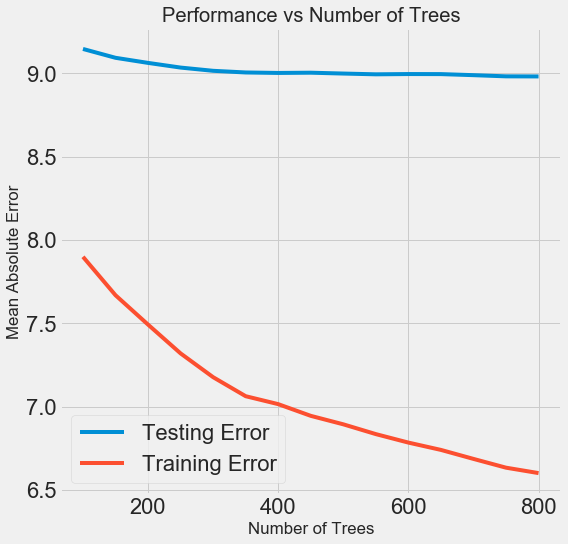

In [126]:
#Get the results on to a dataframe
results = pd.DataFrame(grid_search.cv_results_)

#plot the training and testing error vs number of trees
figsize(8,8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1*results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1*results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Absolute Error'); plt.legend();
plt.title('Performance vs Number of Trees')

In [127]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
14,41.243860,0.850201,0.064419,0.011507,800,{'n_estimators': 800},-8.825290,-8.758299,-9.296941,-9.047485,-8.981946,0.210990,1,-6.739448,-6.648109,-6.486269,-6.530287,-6.601028,0.099437
13,38.758681,0.835135,0.072785,0.001138,750,{'n_estimators': 750},-8.830566,-8.751699,-9.298411,-9.049730,-8.982544,0.212523,2,-6.772908,-6.660453,-6.520818,-6.579989,-6.633542,0.094501
12,36.405242,0.635826,0.069760,0.001660,700,{'n_estimators': 700},-8.836049,-8.755862,-9.312990,-9.053755,-8.989605,0.216159,3,-6.812928,-6.695770,-6.611240,-6.624919,-6.686214,0.079884
9,29.374738,0.272737,0.053450,0.002627,550,{'n_estimators': 550},-8.853730,-8.756938,-9.325492,-9.042721,-8.994663,0.216865,4,-7.003413,-6.781878,-6.809121,-6.745712,-6.835031,0.099783
11,33.762101,0.757471,0.063761,0.002869,650,{'n_estimators': 650},-8.851136,-8.755401,-9.325190,-9.052215,-8.995928,0.218168,5,-6.864375,-6.721452,-6.708191,-6.666758,-6.740194,0.074480


##### Evaluate Final Model on the Test Set

In [129]:
#Default Model
default_model = GradientBoostingRegressor(random_state = 42)

#select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=800, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

1.56 s ± 23.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [132]:
%%timeit -n 1 -r 5
final_model.fit(X,y)

22.5 s ± 109 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [133]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' %mae(y_test, default_pred))
print('Final Model performance on the test set: MAE = %0.4f.' %mae(y_test, final_pred))

Default model performance on the test set: MAE = 10.0130.
Final Model performance on the test set: MAE = 9.0453.


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


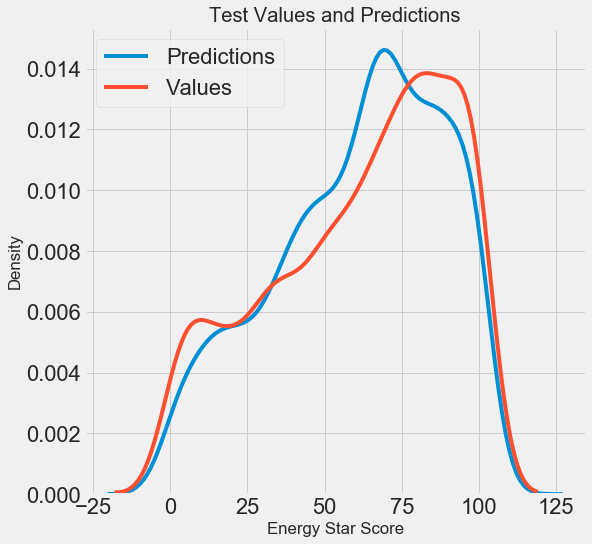

In [134]:
figsize(8,8)

#Density value of final predictions and the test values
sns.kdeplot(final_pred,label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

#Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

The distribution looks to be nearly the same although the density of the predicted values is closer to the median of the test values rather than to the actual peak at 100. It appears the model might be less accurate at predicting the extreme values and instead predicts values closer to the median.

Another diagnostic plot is a histogram of the residuals. Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low)

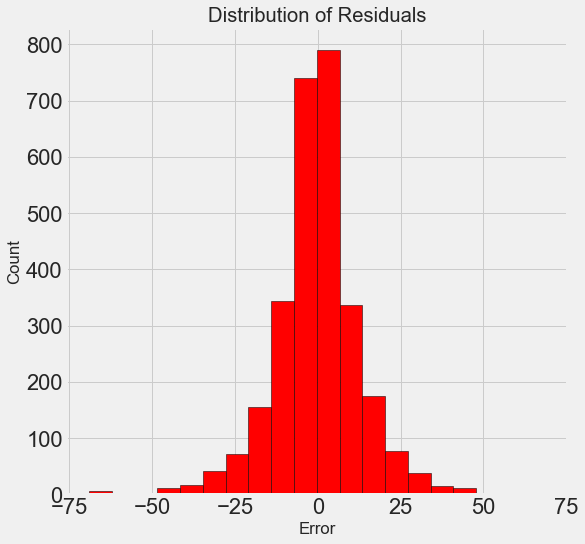

In [135]:
figsize = (6,6)

#calculate the residuals
residuals = final_pred - y_test

#plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
        edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

In [139]:
#Recreate final model
imputer = Imputer(strategy = 'median')

#Train on the training features
imputer.fit(train_features)

#Transform both training and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

#Sklearn wants the labels as one-dimensional vectors
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [140]:
#function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [142]:
model = GradientBoostingRegressor(loss = 'lad', max_depth = 5, max_features = None, 
                                  min_samples_leaf= 6, min_samples_split=6, 
                                  n_estimators = 800, random_state = 42)

model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=800, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [143]:
#make prediction on the test set
model_pred = model.predict(X_test)

print('Final Performance on the test set: MAE = %0.4f' %mae(y_test, model_pred))

Final Performance on the test set: MAE = 9.0839


#### Interpret the Model

Feature Importance.
Locally Interpretable Model-agnostic Explainer(LIME).
Examining a single decision tree in the ensemble.

#### Feature Importance

In [145]:
#Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train_features.columns),
                               'importance': model.feature_importances_})

#show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop = True)

feature_results.head(10)

,feature,importance
0,Site EUI (kBtu/ft²),0.452163
1,Weather Normalized Site Electricity Intensity ...,0.249107
2,Water Intensity (All Water Sources) (gal/ft²),0.056662
3,Property Id,0.031396
4,Largest Property Use Type_Non-Refrigerated War...,0.025153
5,DOF Gross Floor Area,0.025003
6,log_Water Intensity (All Water Sources) (gal/ft²),0.022335
7,Largest Property Use Type_Multifamily Housing,0.021462
8,Order,0.020169
9,log_Direct GHG Emissions (Metric Tons CO2e),0.019410


#### Graphical feature importance

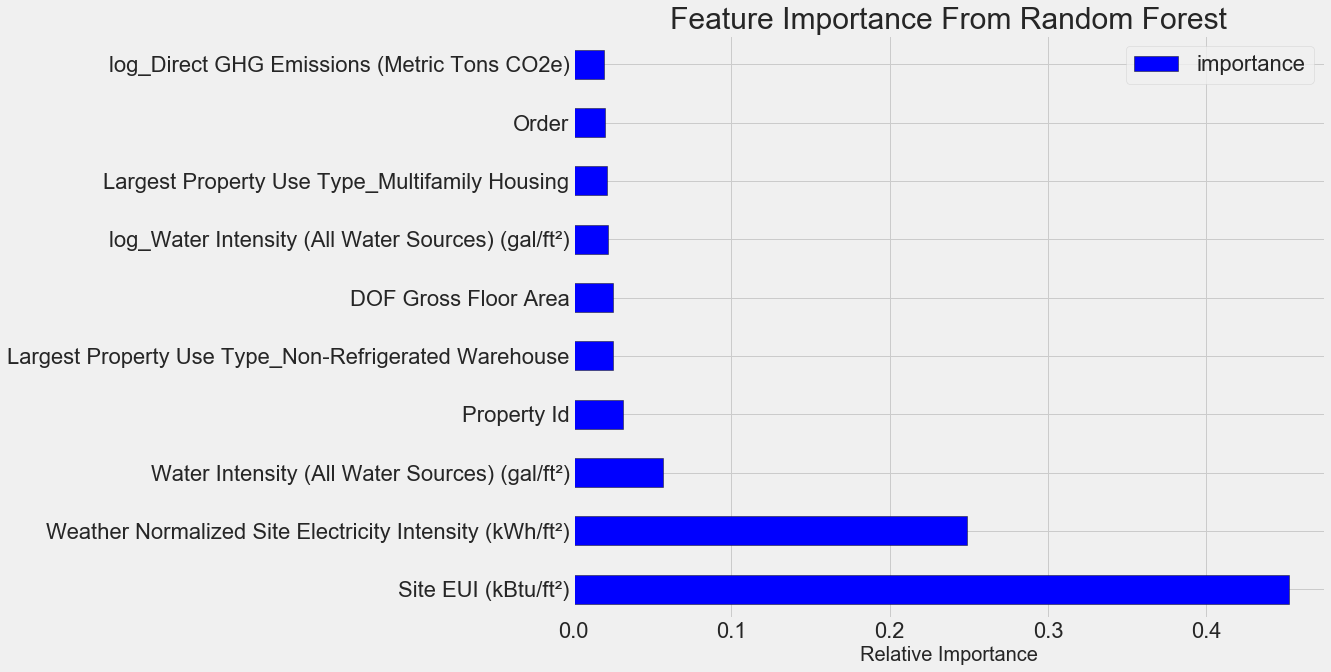

In [146]:
figsize(12,10)
plt.style.use('fivethirtyeight')

#plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance',
                               edgecolor = 'k',
                               kind = 'barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importance From Random Forest', size = 30);

#### Use feature importance for feature selection

In [147]:
#Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

#find the index that corresponds to each feature name
indices = [list(train_features.columns).index(x) for x in most_important_features]

#Keep onlt the most important features
X_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

print('Most Important training features shape:', X_reduced.shape)
print('Most important testing features shape:', X_test_reduced.shape)

Most Important training features shape: (6622, 10)
Most important testing features shape: (2839, 10)


In [149]:
lr = LinearRegression()

#fit on full set of features
lr.fit(X,y)
lr_full_pred = lr.predict(X_test)

#Fit on reduced set of features
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

#Display results
print('Linear Regression Full Results: MAE =  %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))


Linear Regression Full Results: MAE =  13.4651.
Linear Regression Reduced Results: MAE = 14.5095.


In [150]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = 9.3735


#### Using LIME

In [151]:
#find the residuals
residuals = abs(model_reduced_pred - y_test)

# Exact the worst and best predictions
wrong = X_test_reduced[np.argmax(residuals), :]
risht = X_test_reduced[np.argmin(residuals), :]

In [152]:
#create a lime explorer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced,
                                                  mode = 'regression',
                                                  training_labels = y,
                                                  feature_names = list(most_important_features))

Prediction: 16.3665
Actual Value: 96.0000


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.918930e-27
  overwrite_a=True).T


Text(0.5, 0, 'Effect on Prediction')

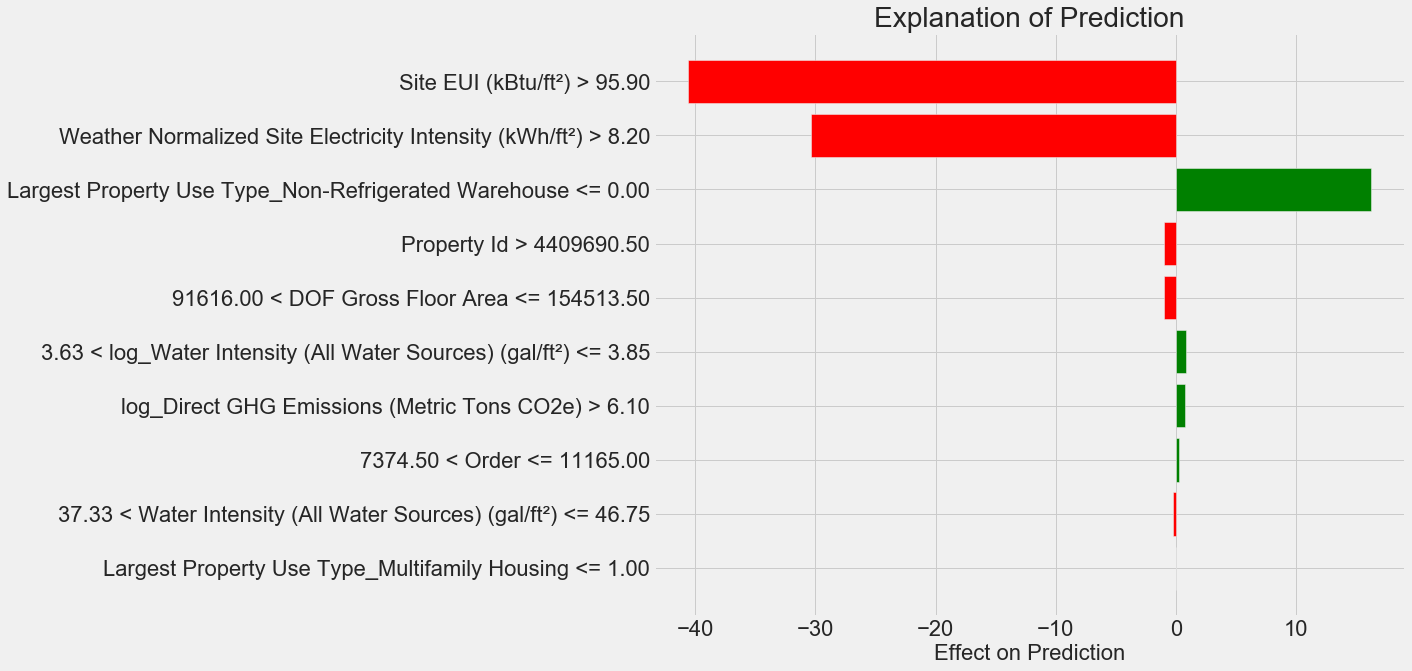

In [154]:
#display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1,-1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

#Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong,
                                      predict_fn = model_reduced.predict)

#plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22)


In this example, our gradient boosted model predicted a score of 12.86 and the actual value was 100.

The plot from LIME is showing us the contribution to the final prediction from each of the features for the example. We can see that the Site EUI singificantly decreased the prediction because it was above 95.50. The Weather Normalized Site Electricity Intensity on the other hand, increased the prediction because it was lower than 3.80.

We can interpret this as saying that our model thought the Energy Star Score would be much lower than it actually was because the Site EUI was high. However, in this case, the score was 100 despite the high value of the EUI. While this significant mistake (off by 88 points!) might initially have been confusing, now we can see that in reality, the model was reasoning through the problem and just arrived at the incorrect value! A human going over the same process probably would have arrived at the same conclusion (if they had the patience to go through all the data).

Now we can go through the same process with a prediction the model got correct.